In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [3]:
# Load the MNIST dataset
mnist = datasets.fetch_openml('mnist_784')
X, y = mnist.data, mnist.target.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logistic_regression = LogisticRegression(max_iter=100)

# Train the model
logistic_regression.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [5]:
# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)

In [6]:
# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9178571428571428


In [7]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1289    1    6    0    5   14   12    6    8    2]
 [   0 1557    5    9    2    7    0    3   15    2]
 [   4   20 1229   25   16    8   19   15   35    9]
 [   6    7   30 1298    1   38    4   14   19   16]
 [   4    0    8    5 1194    4   13    6   12   49]
 [   7   11    8   53   16 1087   20    2   54   15]
 [   7    3   20    0   14   14 1332    2    4    0]
 [   5    4   28    4    8    5    0 1408    2   39]
 [  11   24   17   38    7   39   12   10 1186   13]
 [   7   10    7   14   40    5    0   45   22 1270]]


In [8]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.91      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.89      0.85      0.87      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.87      0.87      0.87      1357
           9       0.90      0.89      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



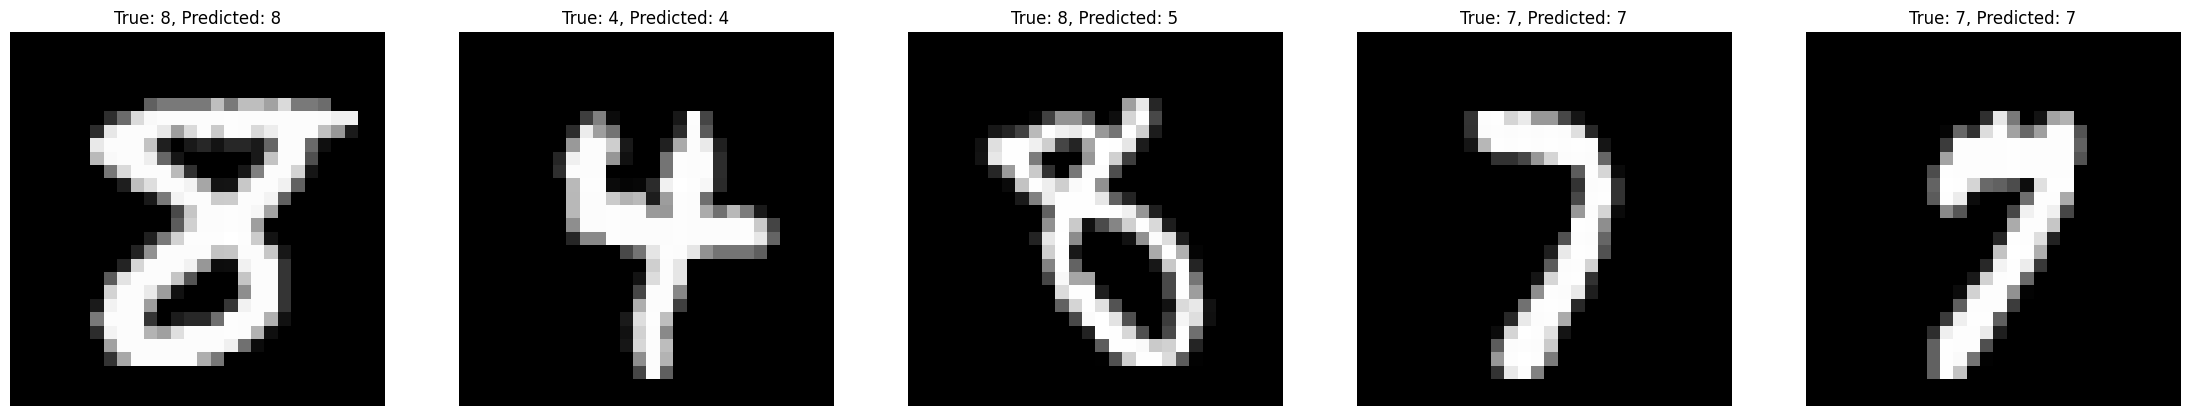

In [17]:
# Display a few predictions
fig, axes = plt.subplots(1,5, figsize=(28,28))
for i in range(5):
    axes[i].imshow(X_test.iloc[i].values.reshape(28, 28), cmap="gray")
    axes[i].set_title(f"True: {y_test.iloc[i]}, Predicted: {y_pred[i]}")
    axes[i].axis("off")
plt.show()